# Matplotlib

## Prof. Henry Cagnini

### Agenda:

* Projeções 3D
  * Dispersão
  * Superfície
* Customização
  * Múltiplas projeções
  * Legenda
  * Anotações textuais
* Animações

## Projeções 3D
### Dispersão

* Existe uma variante tridimensional para a projeção de dispersão

<IPython.core.display.Javascript object>


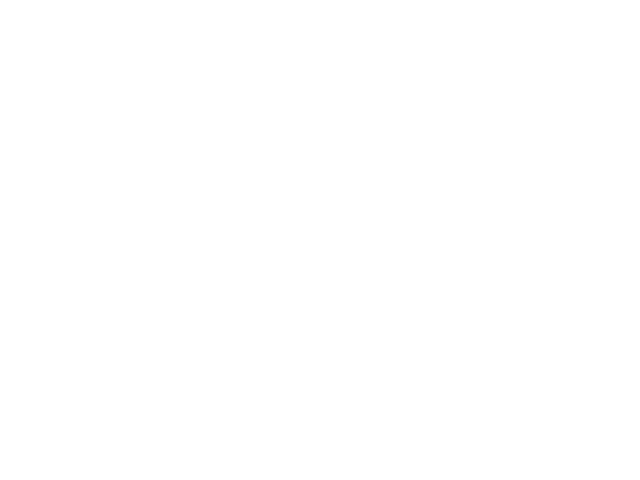

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sample = np.random.pareto(3, size=1000).reshape(10,10,10)

ax.scatter(sample[:,:,0], sample[:,:,1], sample[:,:,2], c='red', marker='o')

ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')
ax.set_zlabel('Eixo z')

plt.show()

## Projeções 3D
### Superfície

<IPython.core.display.Javascript object>


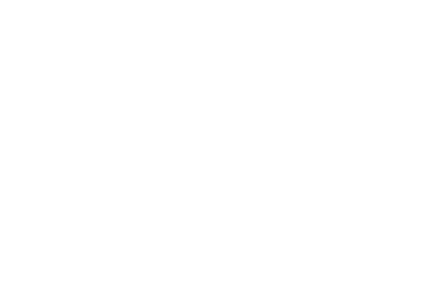

<IPython.core.display.Javascript object>


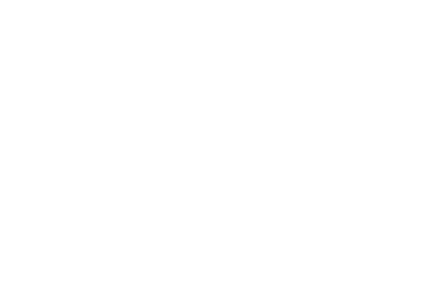

In [6]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

ax = plt.gca(projection='3d')

# gera os dados
_range = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(_range, _range)
r = np.sqrt(x**2 + y**2)
z = np.sin(r)

# projeta a superfície
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)

# customiza o eixo Z 
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

## Customização

* Matplotlib permite diversos tipos de customização
* Permite um controle virtualmente completo sobre as projeções que estão sendo feitas
* Nos próximos slides serão mostradas algumas das opções de customização mais populares

## Customização
### Múltiplas projeções

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,5))

# define projeções
axes[0][0].scatter(np.random.randint(0, 5, size=10), np.random.randint(0, 5, size=10), c=np.random.randint(0, 2, 10))  # linha 0, coluna 0
axes[0][1].plot(np.arange(10), np.random.randint(0, 5, size=10), c='lightblue')  # linha 0, coluna 1
heatmap = axes[1][0].imshow(np.random.random((5,8)), cmap='viridis', interpolation='nearest')
axes[1][1].boxplot(np.random.random(100))

# define títulos e nome dos eixos
axes[0][0].set_title('Dispersão')
axes[0][0].set_xlabel('Eixo x')
axes[0][0].set_ylabel('Eixo x')
axes[0][1].set_title('Linhas')
axes[1][0].set_title('Mapa de calor')
axes[1][1].set_title('Boxplot')
axes[1][1].axis('off')

plt.colorbar(heatmap, ax=axes[1][0])
plt.subplots_adjust(wspace=0.45, hspace=0.45)

plt.suptitle('Projeções variadas')

plt.show()

## Customização
### Anotações

* https://matplotlib.org/users/annotations_intro.html
* Permitem adicionar dicas textuais a uma projeção

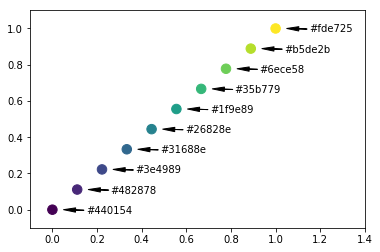

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import to_hex
from matplotlib import cm
import numpy as np

values = np.linspace(0, 1, 10)

hex_colors = list(map(to_hex, cm.viridis(values)))
plt.scatter(values, values, c=hex_colors, s=90)

for x, s in zip(values, hex_colors):
    plt.annotate(
        s, xy=(x + 0.05, x), xytext=(x + 0.15, x - 0.02),
        arrowprops=dict(facecolor='black', shrink=1.1, width=0.02, headwidth=4.3)
    )

plt.xlim(-0.1, 1.4)
plt.ylim(-0.1, 1.1)

plt.show()

## Customização
### Animações

* https://matplotlib.org/api/animation_api.html
* Recurso da matplotlib que permite animar projeções
* Permite exportar estas animações para gifs
* Altamente parametrizável

**IMPORTANTE:** para visualizar o exemplo a seguir, execute o script ```arquivos/animation.py``` a partir da linha de comando:

```
python animation.py
```

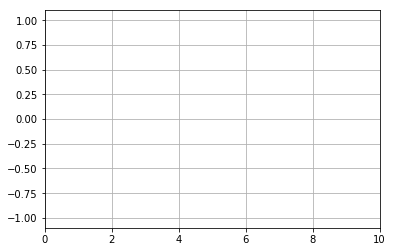

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)

def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []

def run(data):
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(
    fig, run, data_gen, blit=False, interval=10,
    repeat=False, init_func=init
)

plt.show()

## Leitura recomendada

* Biblioteca de projeções 3D: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
* Biblioteca de exemplos da matplotlib: https://matplotlib.org/gallery.html

## Créditos

* Alguns slides foram adaptados do material dos Profs. [Felipe Meneguzzi](http://buscatextual.cnpq.br/buscatextual/visualizacv.do?id=K4701128E9) e [Bernardo Copstein](http://buscatextual.cnpq.br/buscatextual/visualizacv.do?id=K4785689T4)